In [1]:
# -*- coding: utf-8 -*-
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.model_selection as mod_sel
import pydot

RANDOM_SEED = 42
NUM_CLASSES = 7

dataset_path = os.path.join("../full_csv_data/full_data_1.csv")

training_data_path = os.path.join("../full_csv_data/train_data.csv")
testing_data_path = os.path.join("../full_csv_data/test_data.csv")


In [2]:
dataset = pd.read_csv(dataset_path)
training_data = pd.read_csv(training_data_path)
testing_data = pd.read_csv(testing_data_path)

# dataset = dataset.iloc[:, 1:]

dataset.head()

WRIST_x   WRIST_y  THUMB_CMC_x  THUMB_CMC_y  THUMB_MCP_x  THUMB_MCP_y  \
0  0.587292  0.645778     0.562785     0.610625     0.548883     0.550258   
1  0.580777  0.661015     0.556497     0.622755     0.543159     0.564763   
2  0.582599  0.670213     0.557104     0.627109     0.542273     0.563967   
3  0.584030  0.673258     0.558286     0.625489     0.544291     0.561939   
4  0.585115  0.667034     0.559267     0.619904     0.545567     0.557655   

   THUMB_IP_x  THUMB_IP_y  THUMB_TIP_x  THUMB_TIP_y  ...  RING_FINGER_TIP_y  \
0    0.556732    0.507832     0.577612     0.487640  ...           0.549274   
1    0.550922    0.519289     0.571730     0.496221  ...           0.563129   
2    0.549945    0.515890     0.571464     0.490607  ...           0.563648   
3    0.552698    0.514165     0.574654     0.488400  ...           0.561743   
4    0.554347    0.512488     0.576199     0.488906  ...           0.559021   

   PINKY_MCP_x  PINKY_MCP_y  PINKY_PIP_x  PINKY_PIP_y  PINKY_DIP_x  \
0     0.633768     0.524244     0.651393     0.467423     0.662765   
1     0.626761     0.529217     0.644878     0.479159     0.654922   
2     0.628615     0.531993     0.647242     0.480551     0.656991   
3     0.629877     0.532089     0.649057     0.482488     0.659226   
4     0.632383     0.529412     0.651403     0.481268     0.661701   

   PINKY_DIP_y  PINKY_TIP_x  PINKY_TIP_y  GESTURE  
0     0.430578     0.671104     0.392935      5.0  
1     0.443597     0.663010     0.405483      5.0  
2     0.444289     0.664524     0.404008      5.0  
3     0.446588     0.667043     0.405972      5.0  
4     0.446572     0.669413     0.405841      5.0  

[5 rows x 43 columns]

In [3]:

X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]


In [4]:

X_training = training_data.iloc[:, :-1]
y_training = training_data.iloc[:, -1]

X_testing = testing_data.iloc[:, :-1]
y_testing = testing_data.iloc[:, -1]


In [5]:

X_train, X_val, y_train, y_val = mod_sel.train_test_split(X_testing, y_testing, test_size=0.2, random_state=RANDOM_SEED)

X_test = X_testing
y_test = y_testing


In [6]:


X_train, X_test, y_train, y_test = mod_sel.train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

# 0.25 x 0.8 = 0.2
X_train, X_val, y_train, y_val = mod_sel.train_test_split(X_test, y_test, test_size=0.5, random_state=RANDOM_SEED)



# Model building

In [7]:
# 0.97
# tf_model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21 * 2,)),
#     tf.keras.layers.Dropout(0.1),
#     
#     tf.keras.layers.Dense(35, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
#     
#     tf.keras.layers.Dense(30, activation='relu'),   
#     tf.keras.layers.Dropout(0.2),
#     
#     tf.keras.layers.Dense(25, activation='relu'),    
#     tf.keras.layers.Dropout(0.3),
#     
#     tf.keras.layers.Dense(20, activation='relu'),
#     tf.keras.layers.Dropout(0.3),
#     
#     tf.keras.layers.Dense(15, activation='relu'),    
#     tf.keras.layers.Dropout(0.4),
#     
#     tf.keras.layers.Dense(10, activation='relu'),    
#     
#     tf.keras.layers.Dense(CLASSES, activation='softmax')
# ])


# 0.75
# new data 0.92
# tf_model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21 * 2,)),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(20, activation='relu'),
#     tf.keras.layers.Dropout(0.35),
#     tf.keras.layers.Dense(15, activation='relu'),
#     tf.keras.layers.Dense(CLASSES, activation='softmax')
# ])


# # 0.98
# tf_model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21 * 2,)),
#     tf.keras.layers.Dropout(0.1),
#     
#     tf.keras.layers.Dense(35, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
#     
#     tf.keras.layers.Dense(30, activation='relu'),   
#     tf.keras.layers.Dropout(0.25),
#     
#     tf.keras.layers.Dense(25, activation='relu'),    
#     tf.keras.layers.Dropout(0.3),
#     
#     tf.keras.layers.Dense(20, activation='relu'),
#     tf.keras.layers.Dropout(0.3),
#     
#     tf.keras.layers.Dense(15, activation='relu'),    
#     tf.keras.layers.Dropout(0.4),
#     
#     tf.keras.layers.Dense(10, activation='relu'),    
#     
#     tf.keras.layers.Dense(CLASSES, activation='softmax')
# ])


# tf_model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21 * 2,)),
#     
#     tf.keras.layers.Dense(40, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
#     
#     tf.keras.layers.Dense(35, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
#     
#     tf.keras.layers.Dense(30, activation='relu'),   
#     tf.keras.layers.Dropout(0.25),
#     
#     tf.keras.layers.Dense(25, activation='relu'),    
#     tf.keras.layers.Dropout(0.3),
#     
#     tf.keras.layers.Dense(20, activation='relu'),
#     tf.keras.layers.Dropout(0.3),
#     
#     tf.keras.layers.Dense(15, activation='relu'),    
#     tf.keras.layers.Dropout(0.4),
#     
#     tf.keras.layers.Dense(15, activation='relu'),    
#     tf.keras.layers.Dropout(0.4),
#     
#     tf.keras.layers.Dense(10, activation='relu'),    
#     
#     tf.keras.layers.Dense(CLASSES, activation='softmax')
# ])



In [8]:

tf_model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2,)),

    tf.keras.layers.Dense(30, activation='relu'),

    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(20, activation='relu'),

    tf.keras.layers.Dropout(0.3),

    tf.keras.layers.Dense(10, activation='relu'),

    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])


In [9]:

tf_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                1290      
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 7)                 77        
                                                                 
Total params: 2,197
Trainable params: 2,197
Non-trainabl

In [13]:

tf.keras.utils.plot_model(tf_model, to_file="tf_model.svg", show_shapes=True, dpi=None)


ValueError: Cannot embed the 'svg' image format

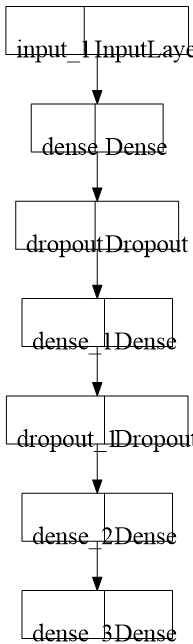

In [75]:

model_save_path = os.path.join("../tf_models/mod1")


In [76]:


# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)

# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)



In [77]:


# Model compilation
tf_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)



In [78]:

history = tf_model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_val, y_val),
    callbacks=[cp_callback, es_callback]
)


Epoch 1/1000
103/115 [=========================>....] - ETA: 0s - loss: 1.9375 - accuracy: 0.1647
Epoch 1: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 7ms/step - loss: 1.9342 - accuracy: 0.1679 - val_loss: 1.8821 - val_accuracy: 0.2276
Epoch 2/1000
107/115 [==========================>...] - ETA: 0s - loss: 1.8224 - accuracy: 0.2662
Epoch 2: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 1.8136 - accuracy: 0.2738 - val_loss: 1.5700 - val_accuracy: 0.5252
Epoch 3/1000
108/115 [===========================>..] - ETA: 0s - loss: 1.4201 - accuracy: 0.4825
Epoch 3: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 8ms/step - loss: 1.4085 - accuracy: 0.4870 - val_loss: 1.0339 - val_accuracy: 0.6863
Epoch 4/1000
107/115 [==========================>...] - ETA: 0s - loss: 1.0548 - accuracy: 0.6292
Epoch 4: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 1.0484 - accuracy: 0.6320 - val_loss: 0.7455 - val_accuracy: 0.8462
Epoch 5/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.8205 - accuracy: 0.7444
Epoch 5: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.8182 - accuracy: 0.7446 - val_loss: 0.5280 - val_accuracy: 0.9087
Epoch 6/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.6690 - accuracy: 0.8023
Epoch 6: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.6672 - accuracy: 0.8031 - val_loss: 0.3917 - val_accuracy: 0.9162
Epoch 7/1000
111/115 [===========================>..] - ETA: 0s - loss: 0.5544 - accuracy: 0.8388
Epoch 7: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.5541 - accuracy: 0.8387 - val_loss: 0.3114 - val_accuracy: 0.9289
Epoch 8/1000
104/115 [==========================>...] - ETA: 0s - loss: 0.5039 - accuracy: 0.8513
Epoch 8: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.5021 - accuracy: 0.8527 - val_loss: 0.2754 - val_accuracy: 0.9365
Epoch 9/1000
106/115 [==========================>...] - ETA: 0s - loss: 0.4482 - accuracy: 0.8726
Epoch 9: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.4451 - accuracy: 0.8739 - val_loss: 0.2641 - val_accuracy: 0.9322
Epoch 10/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.4122 - accuracy: 0.8830
Epoch 10: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 7ms/step - loss: 0.4101 - accuracy: 0.8838 - val_loss: 0.2315 - val_accuracy: 0.9418
Epoch 11/1000
107/115 [==========================>...] - ETA: 0s - loss: 0.3828 - accuracy: 0.8911
Epoch 11: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.3853 - accuracy: 0.8906 - val_loss: 0.2212 - val_accuracy: 0.9454
Epoch 12/1000
107/115 [==========================>...] - ETA: 0s - loss: 0.3810 - accuracy: 0.8941
Epoch 12: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.3799 - accuracy: 0.8945 - val_loss: 0.2131 - val_accuracy: 0.9442
Epoch 13/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.3505 - accuracy: 0.9029
Epoch 13: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.3486 - accuracy: 0.9036 - val_loss: 0.1949 - val_accuracy: 0.9514
Epoch 14/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.3409 - accuracy: 0.9080
Epoch 14: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.3399 - accuracy: 0.9086 - val_loss: 0.1849 - val_accuracy: 0.9522
Epoch 15/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.3201 - accuracy: 0.9146
Epoch 15: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.3217 - accuracy: 0.9139 - val_loss: 0.1739 - val_accuracy: 0.9561
Epoch 16/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.3056 - accuracy: 0.9174
Epoch 16: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.3025 - accuracy: 0.9185 - val_loss: 0.1674 - val_accuracy: 0.9592
Epoch 17/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.3008 - accuracy: 0.9175
Epoch 17: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.3009 - accuracy: 0.9171 - val_loss: 0.1629 - val_accuracy: 0.9576
Epoch 18/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.2846 - accuracy: 0.9266
Epoch 18: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 7ms/step - loss: 0.2833 - accuracy: 0.9268 - val_loss: 0.1663 - val_accuracy: 0.9571
Epoch 19/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.2798 - accuracy: 0.9239
Epoch 19: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.2763 - accuracy: 0.9249 - val_loss: 0.1598 - val_accuracy: 0.9577
Epoch 20/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.2696 - accuracy: 0.9266
Epoch 20: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.2696 - accuracy: 0.9263 - val_loss: 0.1496 - val_accuracy: 0.9616
Epoch 21/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.2572 - accuracy: 0.9316
Epoch 21: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.2559 - accuracy: 0.9314 - val_loss: 0.1415 - val_accuracy: 0.9634
Epoch 22/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.2514 - accuracy: 0.9311
Epoch 22: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.2523 - accuracy: 0.9306 - val_loss: 0.1528 - val_accuracy: 0.9609
Epoch 23/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.2473 - accuracy: 0.9329
Epoch 23: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.2488 - accuracy: 0.9326 - val_loss: 0.1416 - val_accuracy: 0.9620
Epoch 24/1000
106/115 [==========================>...] - ETA: 0s - loss: 0.2486 - accuracy: 0.9320
Epoch 24: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.2510 - accuracy: 0.9310 - val_loss: 0.1314 - val_accuracy: 0.9682
Epoch 25/1000
105/115 [==========================>...] - ETA: 0s - loss: 0.2361 - accuracy: 0.9374
Epoch 25: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.2354 - accuracy: 0.9378 - val_loss: 0.1310 - val_accuracy: 0.9672
Epoch 26/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.2396 - accuracy: 0.9354
Epoch 26: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 7ms/step - loss: 0.2372 - accuracy: 0.9365 - val_loss: 0.1303 - val_accuracy: 0.9658
Epoch 27/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.2297 - accuracy: 0.9371
Epoch 27: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.2281 - accuracy: 0.9375 - val_loss: 0.1429 - val_accuracy: 0.9609
Epoch 28/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.2270 - accuracy: 0.9387
Epoch 28: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.2263 - accuracy: 0.9391 - val_loss: 0.1249 - val_accuracy: 0.9672
Epoch 29/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.2194 - accuracy: 0.9401
Epoch 29: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.2200 - accuracy: 0.9401 - val_loss: 0.1315 - val_accuracy: 0.9653
Epoch 30/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.2166 - accuracy: 0.9412
Epoch 30: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.2166 - accuracy: 0.9410 - val_loss: 0.1198 - val_accuracy: 0.9685
Epoch 31/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.2096 - accuracy: 0.9425
Epoch 31: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.2111 - accuracy: 0.9418 - val_loss: 0.1156 - val_accuracy: 0.9710
Epoch 32/1000
107/115 [==========================>...] - ETA: 0s - loss: 0.2113 - accuracy: 0.9423
Epoch 32: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.2104 - accuracy: 0.9426 - val_loss: 0.1149 - val_accuracy: 0.9707
Epoch 33/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.2072 - accuracy: 0.9439
Epoch 33: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.2096 - accuracy: 0.9433 - val_loss: 0.1228 - val_accuracy: 0.9693
Epoch 34/1000
102/115 [=========================>....] - ETA: 0s - loss: 0.2043 - accuracy: 0.9454
Epoch 34: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.2034 - accuracy: 0.9461 - val_loss: 0.1164 - val_accuracy: 0.9680
Epoch 35/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.2018 - accuracy: 0.9452
Epoch 35: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 7ms/step - loss: 0.1979 - accuracy: 0.9462 - val_loss: 0.1063 - val_accuracy: 0.9729
Epoch 36/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.1965 - accuracy: 0.9480
Epoch 36: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1964 - accuracy: 0.9481 - val_loss: 0.1360 - val_accuracy: 0.9630
Epoch 37/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.1964 - accuracy: 0.9461
Epoch 37: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1965 - accuracy: 0.9454 - val_loss: 0.1023 - val_accuracy: 0.9742
Epoch 38/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.1885 - accuracy: 0.9473
Epoch 38: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1871 - accuracy: 0.9477 - val_loss: 0.1044 - val_accuracy: 0.9737
Epoch 39/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.1949 - accuracy: 0.9484
Epoch 39: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1936 - accuracy: 0.9486 - val_loss: 0.1051 - val_accuracy: 0.9715
Epoch 40/1000
105/115 [==========================>...] - ETA: 0s - loss: 0.1813 - accuracy: 0.9508
Epoch 40: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1809 - accuracy: 0.9510 - val_loss: 0.1078 - val_accuracy: 0.9724
Epoch 41/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.1849 - accuracy: 0.9496
Epoch 41: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1837 - accuracy: 0.9504 - val_loss: 0.0935 - val_accuracy: 0.9764
Epoch 42/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1844 - accuracy: 0.9508
Epoch 42: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1854 - accuracy: 0.9501 - val_loss: 0.0980 - val_accuracy: 0.9747
Epoch 43/1000
111/115 [===========================>..] - ETA: 0s - loss: 0.1819 - accuracy: 0.9500
Epoch 43: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 7ms/step - loss: 0.1849 - accuracy: 0.9492 - val_loss: 0.1099 - val_accuracy: 0.9709
Epoch 44/1000
106/115 [==========================>...] - ETA: 0s - loss: 0.1813 - accuracy: 0.9499
Epoch 44: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1838 - accuracy: 0.9494 - val_loss: 0.0998 - val_accuracy: 0.9721
Epoch 45/1000
107/115 [==========================>...] - ETA: 0s - loss: 0.1789 - accuracy: 0.9521
Epoch 45: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1797 - accuracy: 0.9517 - val_loss: 0.1025 - val_accuracy: 0.9739
Epoch 46/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1740 - accuracy: 0.9528
Epoch 46: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1737 - accuracy: 0.9528 - val_loss: 0.1047 - val_accuracy: 0.9728
Epoch 47/1000
111/115 [===========================>..] - ETA: 0s - loss: 0.1845 - accuracy: 0.9507
Epoch 47: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1826 - accuracy: 0.9511 - val_loss: 0.0935 - val_accuracy: 0.9755
Epoch 48/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.1606 - accuracy: 0.9558
Epoch 48: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1620 - accuracy: 0.9555 - val_loss: 0.0905 - val_accuracy: 0.9766
Epoch 49/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.1734 - accuracy: 0.9512
Epoch 49: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1728 - accuracy: 0.9514 - val_loss: 0.1027 - val_accuracy: 0.9720
Epoch 50/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.1697 - accuracy: 0.9547
Epoch 50: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1675 - accuracy: 0.9554 - val_loss: 0.1048 - val_accuracy: 0.9726
Epoch 51/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1610 - accuracy: 0.9563
Epoch 51: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1627 - accuracy: 0.9558 - val_loss: 0.1000 - val_accuracy: 0.9740
Epoch 52/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.1629 - accuracy: 0.9558
Epoch 52: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 7ms/step - loss: 0.1634 - accuracy: 0.9556 - val_loss: 0.0923 - val_accuracy: 0.9765
Epoch 53/1000
111/115 [===========================>..] - ETA: 0s - loss: 0.1633 - accuracy: 0.9569
Epoch 53: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1631 - accuracy: 0.9566 - val_loss: 0.0892 - val_accuracy: 0.9770
Epoch 54/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.1612 - accuracy: 0.9558
Epoch 54: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1624 - accuracy: 0.9555 - val_loss: 0.0877 - val_accuracy: 0.9762
Epoch 55/1000
105/115 [==========================>...] - ETA: 0s - loss: 0.1617 - accuracy: 0.9551
Epoch 55: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1610 - accuracy: 0.9553 - val_loss: 0.0882 - val_accuracy: 0.9766
Epoch 56/1000
106/115 [==========================>...] - ETA: 0s - loss: 0.1628 - accuracy: 0.9539
Epoch 56: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1620 - accuracy: 0.9543 - val_loss: 0.0842 - val_accuracy: 0.9772
Epoch 57/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.1641 - accuracy: 0.9553
Epoch 57: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1633 - accuracy: 0.9552 - val_loss: 0.0847 - val_accuracy: 0.9774
Epoch 58/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1668 - accuracy: 0.9553
Epoch 58: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1659 - accuracy: 0.9558 - val_loss: 0.0890 - val_accuracy: 0.9765
Epoch 59/1000
112/115 [============================>.] - ETA: 0s - loss: 0.1526 - accuracy: 0.9587
Epoch 59: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 7ms/step - loss: 0.1531 - accuracy: 0.9583 - val_loss: 0.0833 - val_accuracy: 0.9782
Epoch 60/1000
107/115 [==========================>...] - ETA: 0s - loss: 0.1616 - accuracy: 0.9563
Epoch 60: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1611 - accuracy: 0.9564 - val_loss: 0.0877 - val_accuracy: 0.9767
Epoch 61/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1599 - accuracy: 0.9550
Epoch 61: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1614 - accuracy: 0.9550 - val_loss: 0.0980 - val_accuracy: 0.9743
Epoch 62/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1544 - accuracy: 0.9572
Epoch 62: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1548 - accuracy: 0.9570 - val_loss: 0.0906 - val_accuracy: 0.9764
Epoch 63/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.1609 - accuracy: 0.9552
Epoch 63: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1601 - accuracy: 0.9555 - val_loss: 0.0805 - val_accuracy: 0.9791
Epoch 64/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.1508 - accuracy: 0.9591
Epoch 64: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1499 - accuracy: 0.9594 - val_loss: 0.0838 - val_accuracy: 0.9780
Epoch 65/1000
111/115 [===========================>..] - ETA: 0s - loss: 0.1558 - accuracy: 0.9588
Epoch 65: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1554 - accuracy: 0.9587 - val_loss: 0.0811 - val_accuracy: 0.9778
Epoch 66/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.1498 - accuracy: 0.9589
Epoch 66: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1514 - accuracy: 0.9585 - val_loss: 0.0833 - val_accuracy: 0.9778
Epoch 67/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.1575 - accuracy: 0.9557
Epoch 67: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 7ms/step - loss: 0.1572 - accuracy: 0.9559 - val_loss: 0.0822 - val_accuracy: 0.9784
Epoch 68/1000
107/115 [==========================>...] - ETA: 0s - loss: 0.1569 - accuracy: 0.9543
Epoch 68: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1549 - accuracy: 0.9545 - val_loss: 0.0917 - val_accuracy: 0.9763
Epoch 69/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1489 - accuracy: 0.9575
Epoch 69: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1477 - accuracy: 0.9575 - val_loss: 0.0765 - val_accuracy: 0.9791
Epoch 70/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.1478 - accuracy: 0.9586
Epoch 70: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1464 - accuracy: 0.9589 - val_loss: 0.0778 - val_accuracy: 0.9794
Epoch 71/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.1384 - accuracy: 0.9622
Epoch 71: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1421 - accuracy: 0.9612 - val_loss: 0.0844 - val_accuracy: 0.9767
Epoch 72/1000
106/115 [==========================>...] - ETA: 0s - loss: 0.1480 - accuracy: 0.9588
Epoch 72: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1471 - accuracy: 0.9588 - val_loss: 0.0808 - val_accuracy: 0.9785
Epoch 73/1000
106/115 [==========================>...] - ETA: 0s - loss: 0.1408 - accuracy: 0.9610
Epoch 73: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1418 - accuracy: 0.9608 - val_loss: 0.0822 - val_accuracy: 0.9774
Epoch 74/1000
104/115 [==========================>...] - ETA: 0s - loss: 0.1469 - accuracy: 0.9588
Epoch 74: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1485 - accuracy: 0.9588 - val_loss: 0.0825 - val_accuracy: 0.9768
Epoch 75/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.1394 - accuracy: 0.9594
Epoch 75: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1381 - accuracy: 0.9598 - val_loss: 0.0803 - val_accuracy: 0.9794
Epoch 76/1000
103/115 [=========================>....] - ETA: 0s - loss: 0.1496 - accuracy: 0.9574
Epoch 76: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 7ms/step - loss: 0.1487 - accuracy: 0.9581 - val_loss: 0.0766 - val_accuracy: 0.9797
Epoch 77/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.1421 - accuracy: 0.9602
Epoch 77: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1420 - accuracy: 0.9605 - val_loss: 0.0855 - val_accuracy: 0.9770
Epoch 78/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.1402 - accuracy: 0.9605
Epoch 78: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1385 - accuracy: 0.9609 - val_loss: 0.0764 - val_accuracy: 0.9800
Epoch 79/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.1400 - accuracy: 0.9619
Epoch 79: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1392 - accuracy: 0.9619 - val_loss: 0.0767 - val_accuracy: 0.9796
Epoch 80/1000
111/115 [===========================>..] - ETA: 0s - loss: 0.1353 - accuracy: 0.9619
Epoch 80: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1354 - accuracy: 0.9618 - val_loss: 0.0742 - val_accuracy: 0.9815
Epoch 81/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.1404 - accuracy: 0.9620
Epoch 81: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1395 - accuracy: 0.9619 - val_loss: 0.0779 - val_accuracy: 0.9796
Epoch 82/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1333 - accuracy: 0.9624
Epoch 82: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1355 - accuracy: 0.9613 - val_loss: 0.0743 - val_accuracy: 0.9793
Epoch 83/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.1349 - accuracy: 0.9628
Epoch 83: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1349 - accuracy: 0.9631 - val_loss: 0.0753 - val_accuracy: 0.9808
Epoch 84/1000
112/115 [============================>.] - ETA: 0s - loss: 0.1414 - accuracy: 0.9613
Epoch 84: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 7ms/step - loss: 0.1407 - accuracy: 0.9615 - val_loss: 0.0836 - val_accuracy: 0.9782
Epoch 85/1000
112/115 [============================>.] - ETA: 0s - loss: 0.1254 - accuracy: 0.9647
Epoch 85: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1255 - accuracy: 0.9648 - val_loss: 0.0852 - val_accuracy: 0.9773
Epoch 86/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.1361 - accuracy: 0.9627
Epoch 86: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1354 - accuracy: 0.9627 - val_loss: 0.0710 - val_accuracy: 0.9817
Epoch 87/1000
107/115 [==========================>...] - ETA: 0s - loss: 0.1317 - accuracy: 0.9645
Epoch 87: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1303 - accuracy: 0.9653 - val_loss: 0.0786 - val_accuracy: 0.9794
Epoch 88/1000
106/115 [==========================>...] - ETA: 0s - loss: 0.1374 - accuracy: 0.9609
Epoch 88: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1367 - accuracy: 0.9611 - val_loss: 0.0733 - val_accuracy: 0.9801
Epoch 89/1000
102/115 [=========================>....] - ETA: 0s - loss: 0.1365 - accuracy: 0.9635
Epoch 89: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1348 - accuracy: 0.9635 - val_loss: 0.0777 - val_accuracy: 0.9792
Epoch 90/1000
106/115 [==========================>...] - ETA: 0s - loss: 0.1525 - accuracy: 0.9536
Epoch 90: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1541 - accuracy: 0.9533 - val_loss: 0.0781 - val_accuracy: 0.9801
Epoch 91/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.1353 - accuracy: 0.9609
Epoch 91: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1362 - accuracy: 0.9603 - val_loss: 0.0768 - val_accuracy: 0.9788
Epoch 92/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.1333 - accuracy: 0.9612
Epoch 92: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1329 - accuracy: 0.9616 - val_loss: 0.0957 - val_accuracy: 0.9744
Epoch 93/1000
107/115 [==========================>...] - ETA: 0s - loss: 0.1432 - accuracy: 0.9615
Epoch 93: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 7ms/step - loss: 0.1412 - accuracy: 0.9623 - val_loss: 0.0749 - val_accuracy: 0.9791
Epoch 94/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1394 - accuracy: 0.9587
Epoch 94: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1386 - accuracy: 0.9591 - val_loss: 0.0716 - val_accuracy: 0.9819
Epoch 95/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1395 - accuracy: 0.9588
Epoch 95: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1386 - accuracy: 0.9592 - val_loss: 0.0770 - val_accuracy: 0.9802
Epoch 96/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.1231 - accuracy: 0.9662
Epoch 96: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1239 - accuracy: 0.9656 - val_loss: 0.0716 - val_accuracy: 0.9808
Epoch 97/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.1269 - accuracy: 0.9633
Epoch 97: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1261 - accuracy: 0.9634 - val_loss: 0.0727 - val_accuracy: 0.9806
Epoch 98/1000
105/115 [==========================>...] - ETA: 0s - loss: 0.1336 - accuracy: 0.9622
Epoch 98: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1317 - accuracy: 0.9631 - val_loss: 0.0734 - val_accuracy: 0.9801
Epoch 99/1000
112/115 [============================>.] - ETA: 0s - loss: 0.1410 - accuracy: 0.9610
Epoch 99: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1406 - accuracy: 0.9611 - val_loss: 0.0715 - val_accuracy: 0.9813
Epoch 100/1000
111/115 [===========================>..] - ETA: 0s - loss: 0.1317 - accuracy: 0.9609
Epoch 100: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 7ms/step - loss: 0.1310 - accuracy: 0.9610 - val_loss: 0.0692 - val_accuracy: 0.9812
Epoch 101/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.1267 - accuracy: 0.9640
Epoch 101: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1275 - accuracy: 0.9637 - val_loss: 0.0686 - val_accuracy: 0.9819
Epoch 102/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.1321 - accuracy: 0.9624
Epoch 102: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1314 - accuracy: 0.9629 - val_loss: 0.0961 - val_accuracy: 0.9721
Epoch 103/1000
106/115 [==========================>...] - ETA: 0s - loss: 0.1273 - accuracy: 0.9640
Epoch 103: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1262 - accuracy: 0.9642 - val_loss: 0.0708 - val_accuracy: 0.9812
Epoch 104/1000
 97/115 [========================>.....] - ETA: 0s - loss: 0.1299 - accuracy: 0.9646
Epoch 104: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1286 - accuracy: 0.9654 - val_loss: 0.0715 - val_accuracy: 0.9817
Epoch 105/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.1251 - accuracy: 0.9653
Epoch 105: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1247 - accuracy: 0.9649 - val_loss: 0.0682 - val_accuracy: 0.9816
Epoch 106/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.1277 - accuracy: 0.9634
Epoch 106: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1280 - accuracy: 0.9633 - val_loss: 0.0744 - val_accuracy: 0.9802
Epoch 107/1000
111/115 [===========================>..] - ETA: 0s - loss: 0.1194 - accuracy: 0.9669
Epoch 107: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1194 - accuracy: 0.9668 - val_loss: 0.0757 - val_accuracy: 0.9796
Epoch 108/1000
111/115 [===========================>..] - ETA: 0s - loss: 0.1221 - accuracy: 0.9667
Epoch 108: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 7ms/step - loss: 0.1230 - accuracy: 0.9663 - val_loss: 0.0691 - val_accuracy: 0.9815
Epoch 109/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1288 - accuracy: 0.9649
Epoch 109: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1290 - accuracy: 0.9646 - val_loss: 0.0714 - val_accuracy: 0.9814
Epoch 110/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1251 - accuracy: 0.9639
Epoch 110: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1257 - accuracy: 0.9634 - val_loss: 0.0719 - val_accuracy: 0.9814
Epoch 111/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.1259 - accuracy: 0.9638
Epoch 111: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1249 - accuracy: 0.9640 - val_loss: 0.0667 - val_accuracy: 0.9822
Epoch 112/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.1217 - accuracy: 0.9657
Epoch 112: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1221 - accuracy: 0.9656 - val_loss: 0.0859 - val_accuracy: 0.9781
Epoch 113/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1286 - accuracy: 0.9625
Epoch 113: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1295 - accuracy: 0.9619 - val_loss: 0.0692 - val_accuracy: 0.9813
Epoch 114/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1135 - accuracy: 0.9655
Epoch 114: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1151 - accuracy: 0.9653 - val_loss: 0.0713 - val_accuracy: 0.9810
Epoch 115/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1344 - accuracy: 0.9622
Epoch 115: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1342 - accuracy: 0.9622 - val_loss: 0.0682 - val_accuracy: 0.9829
Epoch 116/1000
112/115 [============================>.] - ETA: 0s - loss: 0.1258 - accuracy: 0.9644
Epoch 116: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1261 - accuracy: 0.9642 - val_loss: 0.0691 - val_accuracy: 0.9826
Epoch 117/1000
105/115 [==========================>...] - ETA: 0s - loss: 0.1277 - accuracy: 0.9624
Epoch 117: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 7ms/step - loss: 0.1270 - accuracy: 0.9624 - val_loss: 0.0728 - val_accuracy: 0.9811
Epoch 118/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1276 - accuracy: 0.9629
Epoch 118: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1263 - accuracy: 0.9633 - val_loss: 0.0728 - val_accuracy: 0.9787
Epoch 119/1000
106/115 [==========================>...] - ETA: 0s - loss: 0.1254 - accuracy: 0.9637
Epoch 119: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1262 - accuracy: 0.9640 - val_loss: 0.0648 - val_accuracy: 0.9834
Epoch 120/1000
106/115 [==========================>...] - ETA: 0s - loss: 0.1186 - accuracy: 0.9668
Epoch 120: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1199 - accuracy: 0.9666 - val_loss: 0.0666 - val_accuracy: 0.9821
Epoch 121/1000
106/115 [==========================>...] - ETA: 0s - loss: 0.1242 - accuracy: 0.9632
Epoch 121: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1264 - accuracy: 0.9629 - val_loss: 0.0690 - val_accuracy: 0.9814
Epoch 122/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.1187 - accuracy: 0.9643
Epoch 122: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1186 - accuracy: 0.9644 - val_loss: 0.0870 - val_accuracy: 0.9739
Epoch 123/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.1245 - accuracy: 0.9629
Epoch 123: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1246 - accuracy: 0.9624 - val_loss: 0.0661 - val_accuracy: 0.9824
Epoch 124/1000
111/115 [===========================>..] - ETA: 0s - loss: 0.1220 - accuracy: 0.9637
Epoch 124: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1217 - accuracy: 0.9636 - val_loss: 0.0725 - val_accuracy: 0.9817
Epoch 125/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1265 - accuracy: 0.9621
Epoch 125: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 7ms/step - loss: 0.1264 - accuracy: 0.9622 - val_loss: 0.0637 - val_accuracy: 0.9825
Epoch 126/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.1211 - accuracy: 0.9653
Epoch 126: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1199 - accuracy: 0.9656 - val_loss: 0.0645 - val_accuracy: 0.9826
Epoch 127/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1340 - accuracy: 0.9630
Epoch 127: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1334 - accuracy: 0.9629 - val_loss: 0.0786 - val_accuracy: 0.9774
Epoch 128/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1201 - accuracy: 0.9653
Epoch 128: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1199 - accuracy: 0.9652 - val_loss: 0.0683 - val_accuracy: 0.9832
Epoch 129/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1134 - accuracy: 0.9695
Epoch 129: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1130 - accuracy: 0.9695 - val_loss: 0.0655 - val_accuracy: 0.9828
Epoch 130/1000
107/115 [==========================>...] - ETA: 0s - loss: 0.1164 - accuracy: 0.9668
Epoch 130: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1169 - accuracy: 0.9669 - val_loss: 0.0659 - val_accuracy: 0.9827
Epoch 131/1000
111/115 [===========================>..] - ETA: 0s - loss: 0.1270 - accuracy: 0.9645
Epoch 131: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1275 - accuracy: 0.9641 - val_loss: 0.0654 - val_accuracy: 0.9824
Epoch 132/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1255 - accuracy: 0.9636
Epoch 132: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1246 - accuracy: 0.9640 - val_loss: 0.0822 - val_accuracy: 0.9766
Epoch 133/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1198 - accuracy: 0.9671
Epoch 133: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1199 - accuracy: 0.9670 - val_loss: 0.0602 - val_accuracy: 0.9837
Epoch 134/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.1185 - accuracy: 0.9643
Epoch 134: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 7ms/step - loss: 0.1194 - accuracy: 0.9644 - val_loss: 0.0640 - val_accuracy: 0.9836
Epoch 135/1000
100/115 [=========================>....] - ETA: 0s - loss: 0.1268 - accuracy: 0.9625
Epoch 135: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1234 - accuracy: 0.9637 - val_loss: 0.0636 - val_accuracy: 0.9834
Epoch 136/1000
101/115 [=========================>....] - ETA: 0s - loss: 0.1174 - accuracy: 0.9668
Epoch 136: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1176 - accuracy: 0.9666 - val_loss: 0.0653 - val_accuracy: 0.9829
Epoch 137/1000
107/115 [==========================>...] - ETA: 0s - loss: 0.1174 - accuracy: 0.9636
Epoch 137: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1167 - accuracy: 0.9642 - val_loss: 0.0667 - val_accuracy: 0.9816
Epoch 138/1000
111/115 [===========================>..] - ETA: 0s - loss: 0.1218 - accuracy: 0.9657
Epoch 138: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1210 - accuracy: 0.9659 - val_loss: 0.0620 - val_accuracy: 0.9830
Epoch 139/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.1158 - accuracy: 0.9654
Epoch 139: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1175 - accuracy: 0.9657 - val_loss: 0.0708 - val_accuracy: 0.9817
Epoch 140/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.1144 - accuracy: 0.9667
Epoch 140: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1149 - accuracy: 0.9669 - val_loss: 0.0739 - val_accuracy: 0.9817
Epoch 141/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.1211 - accuracy: 0.9643
Epoch 141: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 7ms/step - loss: 0.1214 - accuracy: 0.9640 - val_loss: 0.0632 - val_accuracy: 0.9832
Epoch 142/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.1156 - accuracy: 0.9682
Epoch 142: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1165 - accuracy: 0.9676 - val_loss: 0.0625 - val_accuracy: 0.9839
Epoch 143/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1095 - accuracy: 0.9694
Epoch 143: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1111 - accuracy: 0.9688 - val_loss: 0.0696 - val_accuracy: 0.9817
Epoch 144/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1117 - accuracy: 0.9661
Epoch 144: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1122 - accuracy: 0.9662 - val_loss: 0.0736 - val_accuracy: 0.9816
Epoch 145/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1152 - accuracy: 0.9668
Epoch 145: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1151 - accuracy: 0.9669 - val_loss: 0.0603 - val_accuracy: 0.9841
Epoch 146/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1156 - accuracy: 0.9659
Epoch 146: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1143 - accuracy: 0.9664 - val_loss: 0.0585 - val_accuracy: 0.9850
Epoch 147/1000
107/115 [==========================>...] - ETA: 0s - loss: 0.1103 - accuracy: 0.9666
Epoch 147: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1084 - accuracy: 0.9672 - val_loss: 0.0611 - val_accuracy: 0.9841
Epoch 148/1000
111/115 [===========================>..] - ETA: 0s - loss: 0.1120 - accuracy: 0.9680
Epoch 148: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1129 - accuracy: 0.9672 - val_loss: 0.0669 - val_accuracy: 0.9817
Epoch 149/1000
107/115 [==========================>...] - ETA: 0s - loss: 0.1122 - accuracy: 0.9652
Epoch 149: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 7ms/step - loss: 0.1132 - accuracy: 0.9648 - val_loss: 0.0721 - val_accuracy: 0.9806
Epoch 150/1000
107/115 [==========================>...] - ETA: 0s - loss: 0.1173 - accuracy: 0.9679
Epoch 150: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1171 - accuracy: 0.9676 - val_loss: 0.0706 - val_accuracy: 0.9804
Epoch 151/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.1095 - accuracy: 0.9693
Epoch 151: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1092 - accuracy: 0.9691 - val_loss: 0.0639 - val_accuracy: 0.9829
Epoch 152/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.1135 - accuracy: 0.9679
Epoch 152: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1131 - accuracy: 0.9678 - val_loss: 0.0687 - val_accuracy: 0.9815
Epoch 153/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1189 - accuracy: 0.9658
Epoch 153: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1185 - accuracy: 0.9660 - val_loss: 0.0569 - val_accuracy: 0.9848
Epoch 154/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.1176 - accuracy: 0.9660
Epoch 154: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1178 - accuracy: 0.9660 - val_loss: 0.0676 - val_accuracy: 0.9830
Epoch 155/1000
111/115 [===========================>..] - ETA: 0s - loss: 0.1115 - accuracy: 0.9671
Epoch 155: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1122 - accuracy: 0.9671 - val_loss: 0.0765 - val_accuracy: 0.9779
Epoch 156/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1205 - accuracy: 0.9656
Epoch 156: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1216 - accuracy: 0.9650 - val_loss: 0.0613 - val_accuracy: 0.9841
Epoch 157/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.1083 - accuracy: 0.9686
Epoch 157: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1082 - accuracy: 0.9682 - val_loss: 0.0595 - val_accuracy: 0.9845
Epoch 158/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.1099 - accuracy: 0.9682
Epoch 158: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 7ms/step - loss: 0.1104 - accuracy: 0.9681 - val_loss: 0.0650 - val_accuracy: 0.9824
Epoch 159/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1198 - accuracy: 0.9644
Epoch 159: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1191 - accuracy: 0.9646 - val_loss: 0.0629 - val_accuracy: 0.9827
Epoch 160/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1128 - accuracy: 0.9677
Epoch 160: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1130 - accuracy: 0.9676 - val_loss: 0.0640 - val_accuracy: 0.9830
Epoch 161/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1062 - accuracy: 0.9680
Epoch 161: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1055 - accuracy: 0.9683 - val_loss: 0.0602 - val_accuracy: 0.9847
Epoch 162/1000
106/115 [==========================>...] - ETA: 0s - loss: 0.1077 - accuracy: 0.9691
Epoch 162: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1083 - accuracy: 0.9691 - val_loss: 0.0628 - val_accuracy: 0.9845
Epoch 163/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.1134 - accuracy: 0.9659
Epoch 163: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1143 - accuracy: 0.9656 - val_loss: 0.0646 - val_accuracy: 0.9822
Epoch 164/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.1036 - accuracy: 0.9710
Epoch 164: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1033 - accuracy: 0.9710 - val_loss: 0.0664 - val_accuracy: 0.9834
Epoch 165/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.1058 - accuracy: 0.9690
Epoch 165: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1048 - accuracy: 0.9693 - val_loss: 0.0623 - val_accuracy: 0.9837
Epoch 166/1000
111/115 [===========================>..] - ETA: 0s - loss: 0.1120 - accuracy: 0.9666
Epoch 166: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 7ms/step - loss: 0.1114 - accuracy: 0.9668 - val_loss: 0.0663 - val_accuracy: 0.9832
Epoch 167/1000
107/115 [==========================>...] - ETA: 0s - loss: 0.1197 - accuracy: 0.9659
Epoch 167: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1201 - accuracy: 0.9656 - val_loss: 0.0672 - val_accuracy: 0.9828
Epoch 168/1000
106/115 [==========================>...] - ETA: 0s - loss: 0.1146 - accuracy: 0.9665
Epoch 168: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1139 - accuracy: 0.9667 - val_loss: 0.0682 - val_accuracy: 0.9815
Epoch 169/1000
106/115 [==========================>...] - ETA: 0s - loss: 0.1046 - accuracy: 0.9688
Epoch 169: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1062 - accuracy: 0.9685 - val_loss: 0.0565 - val_accuracy: 0.9851
Epoch 170/1000
106/115 [==========================>...] - ETA: 0s - loss: 0.1053 - accuracy: 0.9683
Epoch 170: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1084 - accuracy: 0.9673 - val_loss: 0.0629 - val_accuracy: 0.9828
Epoch 171/1000
104/115 [==========================>...] - ETA: 0s - loss: 0.1060 - accuracy: 0.9683
Epoch 171: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1062 - accuracy: 0.9684 - val_loss: 0.0706 - val_accuracy: 0.9817
Epoch 172/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.1131 - accuracy: 0.9671
Epoch 172: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1156 - accuracy: 0.9666 - val_loss: 0.0688 - val_accuracy: 0.9813
Epoch 173/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.1154 - accuracy: 0.9656
Epoch 173: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1174 - accuracy: 0.9652 - val_loss: 0.0751 - val_accuracy: 0.9789
Epoch 174/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.1084 - accuracy: 0.9676
Epoch 174: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1067 - accuracy: 0.9681 - val_loss: 0.0624 - val_accuracy: 0.9830
Epoch 175/1000
106/115 [==========================>...] - ETA: 0s - loss: 0.1070 - accuracy: 0.9682
Epoch 175: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 7ms/step - loss: 0.1079 - accuracy: 0.9685 - val_loss: 0.0621 - val_accuracy: 0.9830
Epoch 176/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.1024 - accuracy: 0.9704
Epoch 176: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1035 - accuracy: 0.9698 - val_loss: 0.0613 - val_accuracy: 0.9840
Epoch 177/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1180 - accuracy: 0.9649
Epoch 177: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1175 - accuracy: 0.9650 - val_loss: 0.0722 - val_accuracy: 0.9799
Epoch 178/1000
104/115 [==========================>...] - ETA: 0s - loss: 0.1184 - accuracy: 0.9648
Epoch 178: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1179 - accuracy: 0.9650 - val_loss: 0.0685 - val_accuracy: 0.9802
Epoch 179/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.1055 - accuracy: 0.9683
Epoch 179: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1043 - accuracy: 0.9688 - val_loss: 0.0674 - val_accuracy: 0.9832
Epoch 180/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1026 - accuracy: 0.9701
Epoch 180: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1038 - accuracy: 0.9700 - val_loss: 0.0557 - val_accuracy: 0.9852
Epoch 181/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.1013 - accuracy: 0.9705
Epoch 181: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1011 - accuracy: 0.9703 - val_loss: 0.0592 - val_accuracy: 0.9852
Epoch 182/1000
107/115 [==========================>...] - ETA: 0s - loss: 0.1078 - accuracy: 0.9674
Epoch 182: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 7ms/step - loss: 0.1082 - accuracy: 0.9675 - val_loss: 0.0613 - val_accuracy: 0.9837
Epoch 183/1000
 99/115 [========================>.....] - ETA: 0s - loss: 0.1106 - accuracy: 0.9681
Epoch 183: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1131 - accuracy: 0.9680 - val_loss: 0.0601 - val_accuracy: 0.9838
Epoch 184/1000
106/115 [==========================>...] - ETA: 0s - loss: 0.1008 - accuracy: 0.9711
Epoch 184: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1012 - accuracy: 0.9709 - val_loss: 0.0614 - val_accuracy: 0.9845
Epoch 185/1000
100/115 [=========================>....] - ETA: 0s - loss: 0.1116 - accuracy: 0.9665
Epoch 185: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1105 - accuracy: 0.9663 - val_loss: 0.0579 - val_accuracy: 0.9847
Epoch 186/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.1047 - accuracy: 0.9700
Epoch 186: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1057 - accuracy: 0.9700 - val_loss: 0.0561 - val_accuracy: 0.9848
Epoch 187/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1076 - accuracy: 0.9680
Epoch 187: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1070 - accuracy: 0.9683 - val_loss: 0.0710 - val_accuracy: 0.9829
Epoch 188/1000
107/115 [==========================>...] - ETA: 0s - loss: 0.1093 - accuracy: 0.9690
Epoch 188: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1075 - accuracy: 0.9692 - val_loss: 0.0610 - val_accuracy: 0.9832
Epoch 189/1000
111/115 [===========================>..] - ETA: 0s - loss: 0.1009 - accuracy: 0.9705
Epoch 189: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1005 - accuracy: 0.9705 - val_loss: 0.0575 - val_accuracy: 0.9843
Epoch 190/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1015 - accuracy: 0.9718
Epoch 190: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 7ms/step - loss: 0.1021 - accuracy: 0.9718 - val_loss: 0.0593 - val_accuracy: 0.9847
Epoch 191/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.1023 - accuracy: 0.9697
Epoch 191: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1030 - accuracy: 0.9697 - val_loss: 0.0572 - val_accuracy: 0.9852
Epoch 192/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.1001 - accuracy: 0.9713
Epoch 192: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1030 - accuracy: 0.9703 - val_loss: 0.0653 - val_accuracy: 0.9843
Epoch 193/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1121 - accuracy: 0.9677
Epoch 193: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1104 - accuracy: 0.9681 - val_loss: 0.0632 - val_accuracy: 0.9826
Epoch 194/1000
106/115 [==========================>...] - ETA: 0s - loss: 0.1124 - accuracy: 0.9669
Epoch 194: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1113 - accuracy: 0.9671 - val_loss: 0.0608 - val_accuracy: 0.9842
Epoch 195/1000
109/115 [===========================>..] - ETA: 0s - loss: 0.1077 - accuracy: 0.9676
Epoch 195: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1058 - accuracy: 0.9681 - val_loss: 0.0585 - val_accuracy: 0.9842
Epoch 196/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.1033 - accuracy: 0.9695
Epoch 196: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1038 - accuracy: 0.9693 - val_loss: 0.0584 - val_accuracy: 0.9836
Epoch 197/1000
108/115 [===========================>..] - ETA: 0s - loss: 0.1054 - accuracy: 0.9697
Epoch 197: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1064 - accuracy: 0.9691 - val_loss: 0.0631 - val_accuracy: 0.9834
Epoch 198/1000
110/115 [===========================>..] - ETA: 0s - loss: 0.1015 - accuracy: 0.9700
Epoch 198: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 5ms/step - loss: 0.1007 - accuracy: 0.9704 - val_loss: 0.0569 - val_accuracy: 0.9854
Epoch 199/1000
102/115 [=========================>....] - ETA: 0s - loss: 0.1016 - accuracy: 0.9708
Epoch 199: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 7ms/step - loss: 0.1045 - accuracy: 0.9702 - val_loss: 0.0667 - val_accuracy: 0.9831
Epoch 200/1000
105/115 [==========================>...] - ETA: 0s - loss: 0.1048 - accuracy: 0.9706
Epoch 200: saving model to ../tf_models\mod1
INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


INFO:tensorflow:Assets written to: ../tf_models\mod1\assets


115/115 [==============================] - 1s 6ms/step - loss: 0.1046 - accuracy: 0.9708 - val_loss: 0.0590 - val_accuracy: 0.9836
Epoch 200: early stopping


In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [79]:

# Model evaluation
val_loss, val_acc = tf_model.evaluate(X_test, y_test, batch_size=128)


229/229 [==============================] - 0s 649us/step - loss: 0.0561 - accuracy: 0.9834


In [ ]:
model_save_path = os.path.join("../tf_models/mod1")

In [80]:


# Loading the saved model
model = tf.keras.models.load_model(model_save_path)



# Confusion matrix

914/914 [==============================] - 1s 527us/step


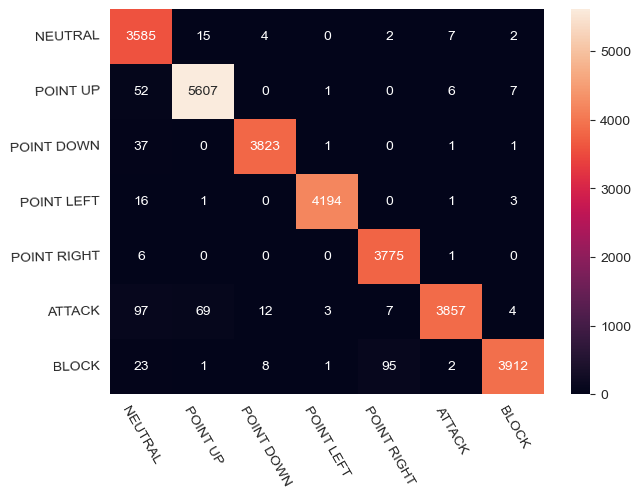

Classification Report
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      3615
         1.0       0.98      0.99      0.99      5673
         2.0       0.99      0.99      0.99      3863
         3.0       1.00      1.00      1.00      4215
         4.0       0.97      1.00      0.99      3782
         5.0       1.00      0.95      0.97      4049
         6.0       1.00      0.97      0.98      4042

    accuracy                           0.98     29239
   macro avg       0.98      0.98      0.98     29239
weighted avg       0.98      0.98      0.98     29239


In [81]:


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

from GestureNumber import GestureNumber


def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    labels_names = [GestureNumber(label).name for label in labels]
    labels_names = [" ".join(label.split("_")) for label in labels_names]
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    plt.figure(figsize=(7, 5))

    sns.heatmap(df_cmx, annot=True, fmt='g', square=False)
    # ax.set_yticklabels(labels_names)
    # ax.set_yticklabelsrotation()
    # ax.tick_params(labelrotation=1.5)
    plt.yticks([idx + 0.5 for idx in range(len(labels))], labels=labels_names, rotation=1.5)
    plt.xticks([idx + 0.5 for idx in range(len(labels))], labels=labels_names, rotation=300)
    plt.ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))


Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)



In [82]:

tflite_save_path = os.path.join("../trained_models/tf_models")
tflite_save_path = os.path.join(tflite_save_path, "model1.tflite")



In [83]:

# Transform model (quantization)
converter = tf.lite.TFLiteConverter.from_keras_model(tf_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)


INFO:tensorflow:Assets written to: C:\Users\barte\AppData\Local\Temp\tmpxi66cb3p\assets


INFO:tensorflow:Assets written to: C:\Users\barte\AppData\Local\Temp\tmpxi66cb3p\assets


7680